<a href="https://colab.research.google.com/github/rolando1102/data-science-bootcamp/blob/main/Wykresy_spolek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

# Nowa sekcja

In [2]:
company = ['PZU.PL','PKO.PL','IRL.PL']

def download_data(company):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    df = web.DataReader(name =company, data_source = 'stooq')
    cols = {col:col+'_'+company for col in df.columns}
    df = df.rename(columns = cols)
    return df

def big_data_source(n=2):
    frames = []
    for i in company[:n]:
        df = download_data(i)
        frames.append(df)
    
    return pd.concat(frames,axis =1, join='outer')

big_df = big_data_source(3)   
big_df = big_df.reset_index()
   


In [3]:
big_df.head(-1)


,Date,Open_PZU.PL,High_PZU.PL,Low_PZU.PL,Close_PZU.PL,Volume_PZU.PL,Open_PKO.PL,High_PKO.PL,Low_PKO.PL,Close_PKO.PL,Volume_PKO.PL,Open_IRL.PL,High_IRL.PL,Low_IRL.PL,Close_IRL.PL,Volume_IRL.PL
0,2015-11-23,30.790,30.790,30.207,30.426,1479332,26.542,26.542,25.596,26.322,2178784,7.6898,7.6898,7.6898,7.6898,1114.0
1,2015-11-24,30.426,30.426,29.451,29.863,1905839,26.341,26.351,25.472,25.472,1763630,7.6898,7.6898,7.6898,7.6898,2646.0
2,2015-11-25,29.972,30.081,29.381,29.644,2751579,25.482,26.026,25.462,25.729,1877085,7.6898,7.7727,7.6898,7.7727,7122.0
3,2015-11-26,29.714,30.096,29.417,29.995,2070463,25.720,25.940,25.290,25.796,1420861,7.6898,7.7686,7.6898,7.6898,4291.0
4,2015-11-27,30.035,30.159,29.826,29.926,1516447,25.692,26.026,25.376,25.386,1601844,7.6857,7.6898,7.6857,7.6898,3018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2020-11-13,24.400,24.690,24.080,24.420,2676681,24.630,25.390,24.430,25.150,5544603,15.5000,15.5000,15.0000,15.4000,3719.0
1243,2020-11-16,24.580,25.510,24.400,25.480,6589828,25.300,27.200,25.300,26.810,7759469,15.3000,15.4500,14.6500,15.2000,10940.0
1244,2020-11-17,25.580,25.940,24.730,25.500,3710776,26.810,26.950,26.170,26.890,4295980,15.2000,15.2000,15.0000,15.1500,11520.0
1245,2020-11-18,25.500,25.980,25.500,25.900,2635535,26.650,27.230,26.530,27.230,3983298,15.1500,15.4500,15.0000,15.4000,4252.0


In [4]:
close_col = [col for col in big_df.columns if col.startswith('Close')]
close_df = big_df[close_col]

close_df.head(5)
close_df.corr()

,Close_PZU.PL,Close_PKO.PL,Close_IRL.PL
Close_PZU.PL,1.000000,0.872373,-0.138441
Close_PKO.PL,0.872373,1.000000,-0.388268
Close_IRL.PL,-0.138441,-0.388268,1.000000


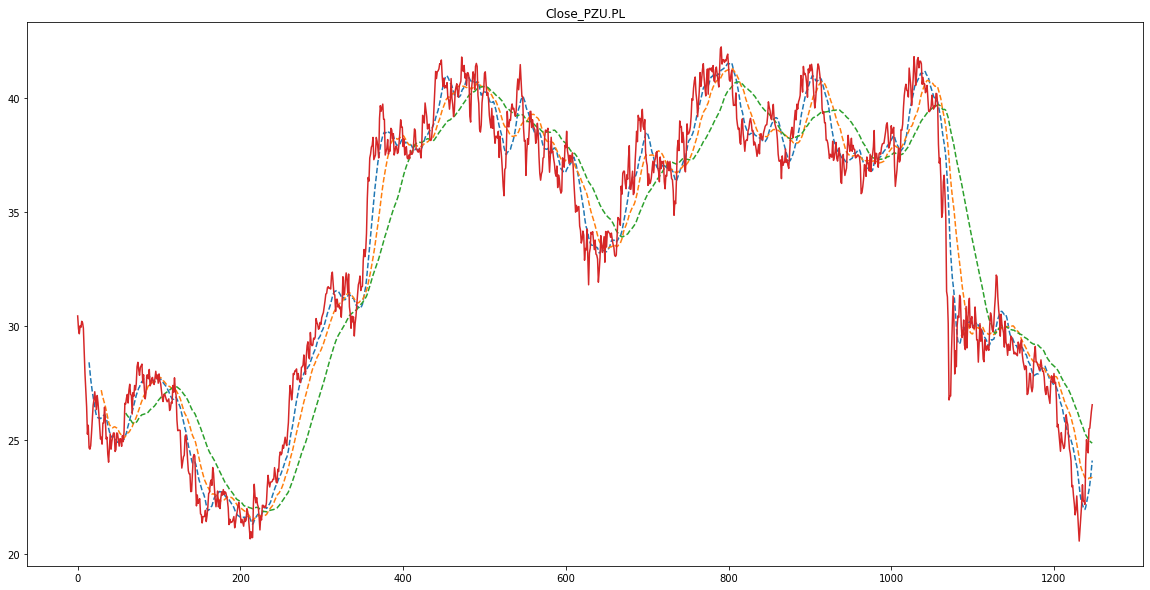

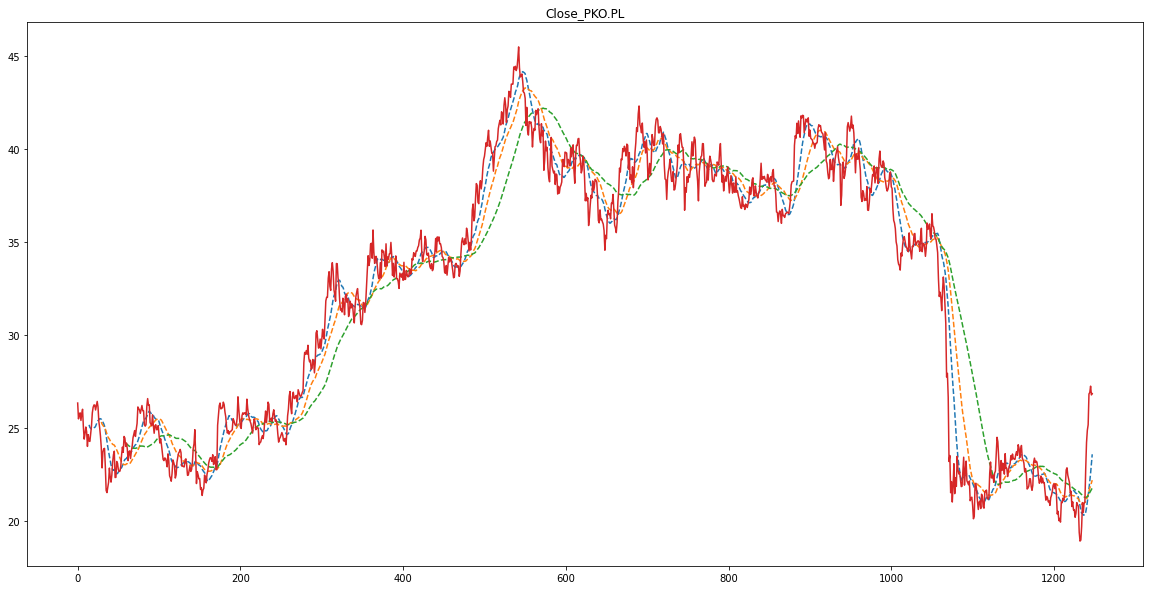

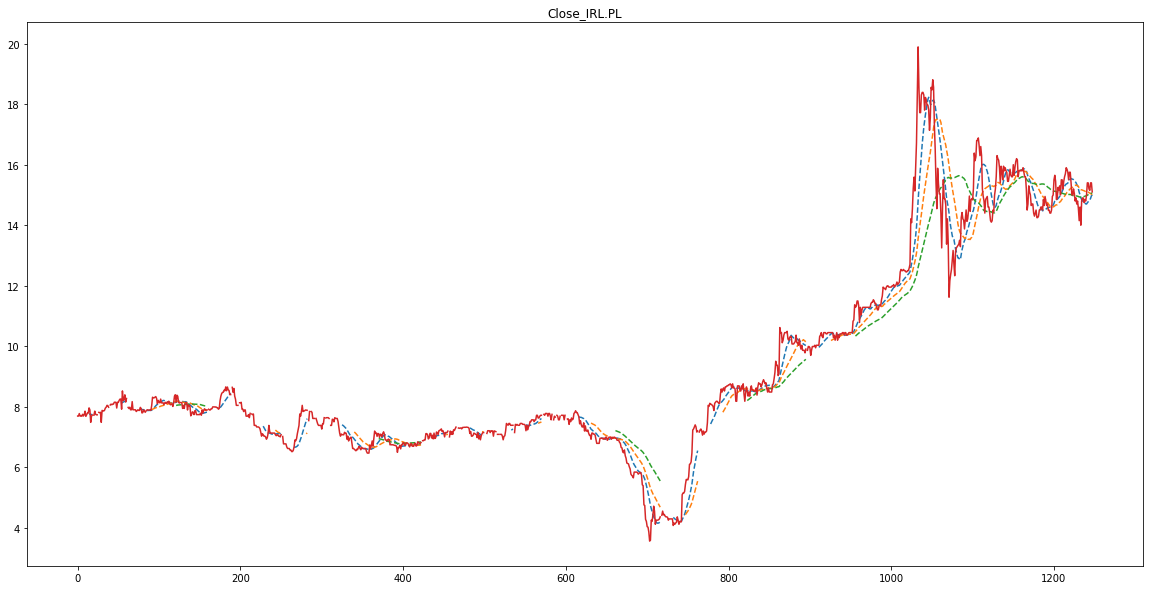

In [5]:
tickers = ['Close_PZU.PL','Close_PKO.PL',	'Close_IRL.PL']
avg = [15,30,60]
for tickers in close_df.columns:
    plt.figure(figsize= [20,10])
    for i in avg:
        close_avg= big_df[tickers].rolling(window =i).mean()
        close_avg.plot(kind = 'line', style ='--')
    big_df[tickers].plot(kind='line',title =tickers)



In [6]:
px.area(big_df, x = 'Date', y='Close_IRL.PL')
px.area(big_df, x= 'Date', y= 'Close_PZU.PL')
px.area(big_df, x= 'Date', y= 'Close_PKO.PL')

#data =[trace0,trace1,trace2]
#layout =go.Layout(title='Wykres spółek')
#fig = go.Figure(data=data,layout=layout)
#fig.show()

In [7]:


IRL = go.Scatter(x=big_df.Date, y =big_df['Close_IRL.PL'],fill='tozeroy')
PZU = go.Scatter(x=big_df.Date, y =big_df['Close_PZU.PL'], fill='tozeroy')
avg_pz = big_df['Close_PZU.PL'].rolling(window=12).mean()
AVG_PZU = go.Line(x=big_df.Date, y =avg_pz)
PKO = go.Scatter(x=big_df.Date, y =big_df['Close_PKO.PL'],fill='tozeroy')
data = [IRL,PZU,PKO,AVG_PZU]
layout = go.Layout(title = 'Wykresy spółek')
fig = go.Figure(data=data,layout=layout)

fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


